# THE SPARKS FOUNDATION
**SUPARNA SARKAR**


**DATA SCIENCE AND BUSINESS ANALYTICS**
**TASK: 1**

**Prediction using Supervised ML.**:
Predict the percentage of a student based on the no. of study hours.

In [51]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
#reading the dataset
data_load = pd.read_excel(r"C:\Users\Suparna\Documents\SuparnaDataset\DataSet.xlsx")  
print("Successfully imported data into console" )  

Successfully imported data into console


In [53]:
#viewing top 10 rows of dataset
data_load.head(10)  

,HOURS,SCORES
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [54]:
#checking for NULL values
data_load.isnull().sum()

HOURS     0
SCORES    0
dtype: int64

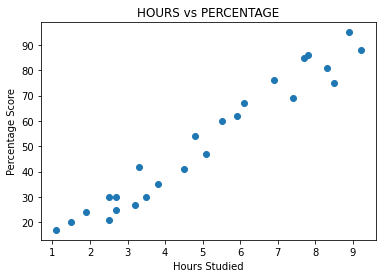

In [55]:
#checking for linearity
plt.scatter(data_load['HOURS'],data_load['SCORES'])
plt.title('HOURS vs PERCENTAGE')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [56]:
#correlation matrix
cor=data_load.corr()
cor #variables positively/highly co-related

,HOURS,SCORES
HOURS,1.000000,0.976191
SCORES,0.976191,1.000000


**TRAINING THE MODEL**

1)Splitting The Data

In [57]:
#defining X and y from the data
X = data_load.iloc[:, :-1].values    
y = data_load.iloc[:, 1].values
#splitting the data in two
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

2)Fitting the Data into the Model

In [58]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("----Model is Trained----")

----Model is Trained----


**PREDICTING THE PERCENTAGE OF MARKS**

In [59]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS**

In [60]:
compare_scores = pd.DataFrame({'Actual Marks' : val_y, 'Predicted Marks' : pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**VISUALLY COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS**

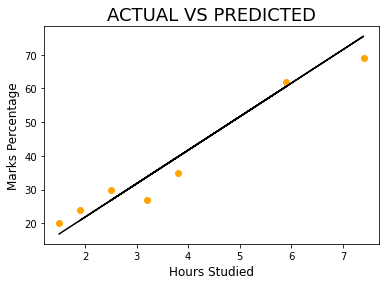

In [61]:
plt.scatter(x=val_X, y=val_y, color='Orange')
plt.plot(val_X, pred_y, color='Black')
plt.title('ACTUAL VS PREDICTED', size=18)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**CHECKING ACCURACY OF THE MODEL**

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y,pred_y)) #less error

Mean Absolute Error: 4.130879918502486


**What will be the Predicted score of a student if he/she studies for 9.25 hours a day?**

In [63]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day, she/he is likely to score 93.89 Marks.**

**SOME OTHER EXAMPLES:**

In [64]:
hours = [5]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 51.641


In [65]:
hours = [9.5]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 96.378
